### **Importing Libraries**

In [1601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### **Loading Data**

In [1602]:
AnaemiaData = pd.read_csv("Dataset/anaemia_dataset.csv")
AnaemiaData

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


### **Exploratory data analysis (EDA)**

In [1603]:
AnaemiaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [1604]:
# Checking null values
AnaemiaData.isna().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [1605]:
# Renaming columns
cols_to_rename = {'%Red Pixel': 'red_pixel',
                  '%Green pixel': 'green_pixel',
                  '%Blue pixel': 'blue_pixel'}

AnaemiaData.rename(columns=cols_to_rename, inplace=True)

In [1606]:
AnaemiaData.columns = map(str.lower, AnaemiaData.columns)

In [1607]:
# Checking duplicated values
AnaemiaData.duplicated().sum()

0

#### **Top and bottom 10 records**

In [1608]:
AnaemiaData.head(10)

,number,sex,red_pixel,green_pixel,blue_pixel,hb,anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,F,45.0423,29.1660,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


In [1609]:
AnaemiaData.tail(10)

,number,sex,red_pixel,green_pixel,blue_pixel,hb,anaemic
94,95,F,42.5314,30.9742,26.4944,8.7,Yes
95,96,M,52.1540,26.0853,21.7607,16.0,No
96,97,F,51.5802,28.2678,20.1520,13.2,No
97,98,M,48.3681,26.9220,24.7099,12.5,No
98,99,M,47.3260,27.2780,25.3960,13.0,No
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [1610]:
# Removing column which do not need in the dataset
AnaemiaData.drop("number", axis=1, inplace=True)

In [1611]:
AnaemiaData.shape

(104, 6)

In [1612]:
AnaemiaData.sex.value_counts()

sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

In [1639]:
# Standardising the values in the sex category
AnaemiaData['sex'] = AnaemiaData['sex'].replace(['M ', 'F '],['M','F'])

In [1614]:
AnaemiaData.anaemic.value_counts()

anaemic
No     78
Yes    26
Name: count, dtype: int64

#### **Statistical description**

In [1615]:
AnaemiaData.describe().T

,count,mean,std,min,25%,50%,75%,max
red_pixel,104.0,45.654175,2.816294,38.7968,43.911375,45.38535,46.968325,54.6478
green_pixel,104.0,28.875507,1.554275,25.1403,27.871300,28.94875,29.887275,32.3681
blue_pixel,104.0,25.470325,1.984671,19.5413,24.896425,25.95320,26.721600,29.8414
hb,104.0,12.150962,2.512957,2.8000,10.650000,12.60000,14.000000,16.3000


#### **Target Data Distribution**

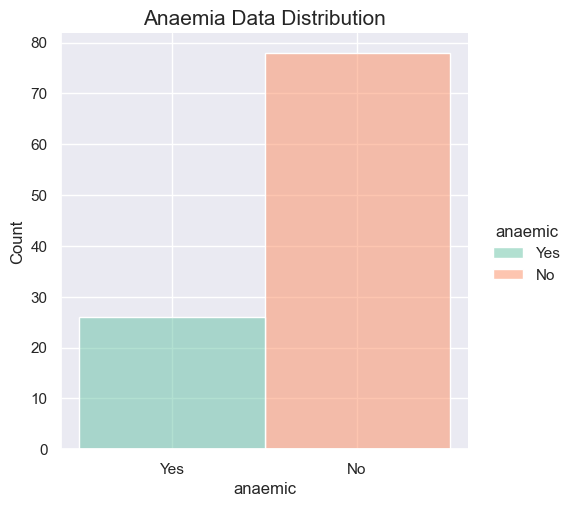

In [1616]:
sns.set(style="darkgrid", palette="Set2")
sns.displot(AnaemiaData, x="anaemic", hue="anaemic")
plt.title("Anaemia Data Distribution", fontsize=15)
plt.show()

#### **Categorical Data Distribution**

In [1617]:
AnaemiaData.sex.value_counts()

sex
M    55
F    49
Name: count, dtype: int64

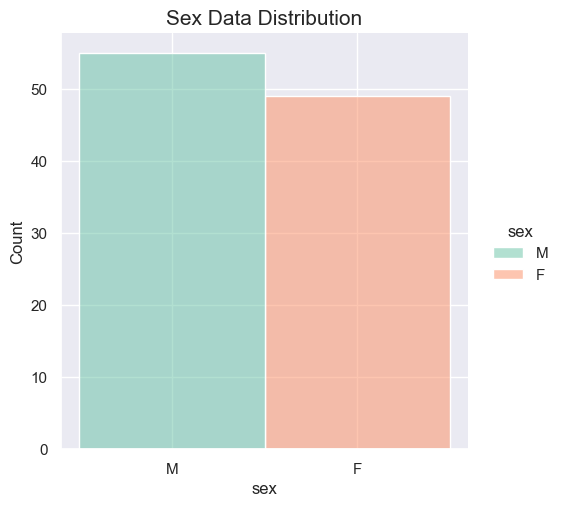

In [1618]:
sns.set(style="darkgrid", palette="Set2")
sns.displot(AnaemiaData, x="sex", hue="sex")
plt.title("Sex Data Distribution", fontsize=15)
plt.show()

#### **Target and Categorical Data Distribution**

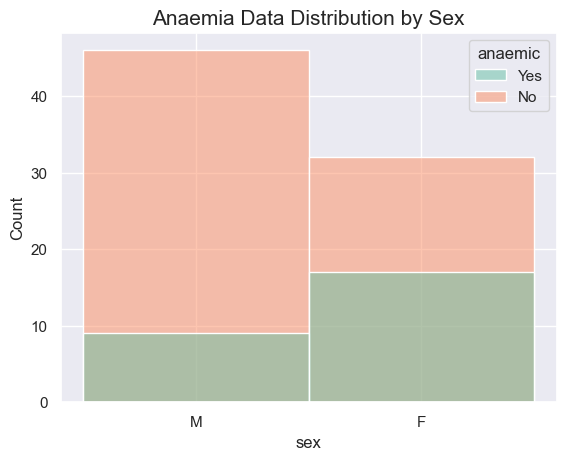

In [1619]:
sns.set(style="darkgrid", palette="Set2")
sns.histplot(AnaemiaData, x="sex", hue="anaemic")
plt.title("Anaemia Data Distribution by Sex", fontsize=15)
plt.show()

#### **Sampling the Anaemia Color Images**

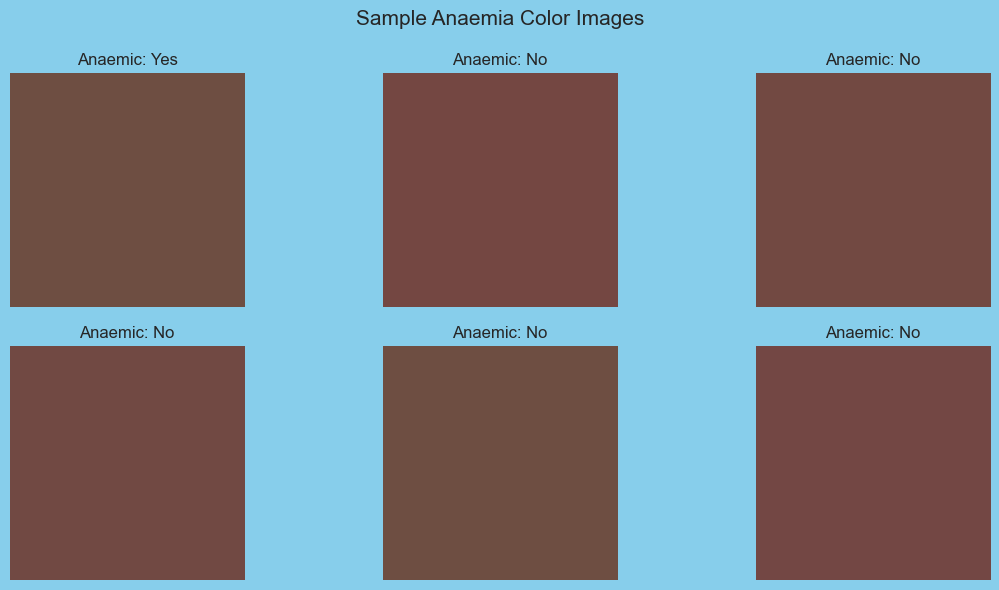

In [1620]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,6), facecolor="skyblue")

for i in range(0,6):

    r = AnaemiaData['red_pixel'][i] / 100
    g = AnaemiaData['green_pixel'][i] / 100
    b = AnaemiaData['blue_pixel'][i] / 100
    title = AnaemiaData['anaemic'][i]

    color = (r,g,b)
    if i < 3:
        axes[0,i].imshow([[color]])
        axes[0,i].set_title(f'Anaemic: {title}')
        axes[0,i].grid(False)
        axes[0,i].axis(False)
    else:
        axes[1,i-3].imshow([[color]])
        axes[1,i-3].set_title(f'Anaemic: {title}')
        axes[1,i-3].grid(False)
        axes[1,i-3].axis(False)

plt.suptitle("Sample Anaemia Color Images", fontsize=15)
plt.tight_layout()
plt.show()

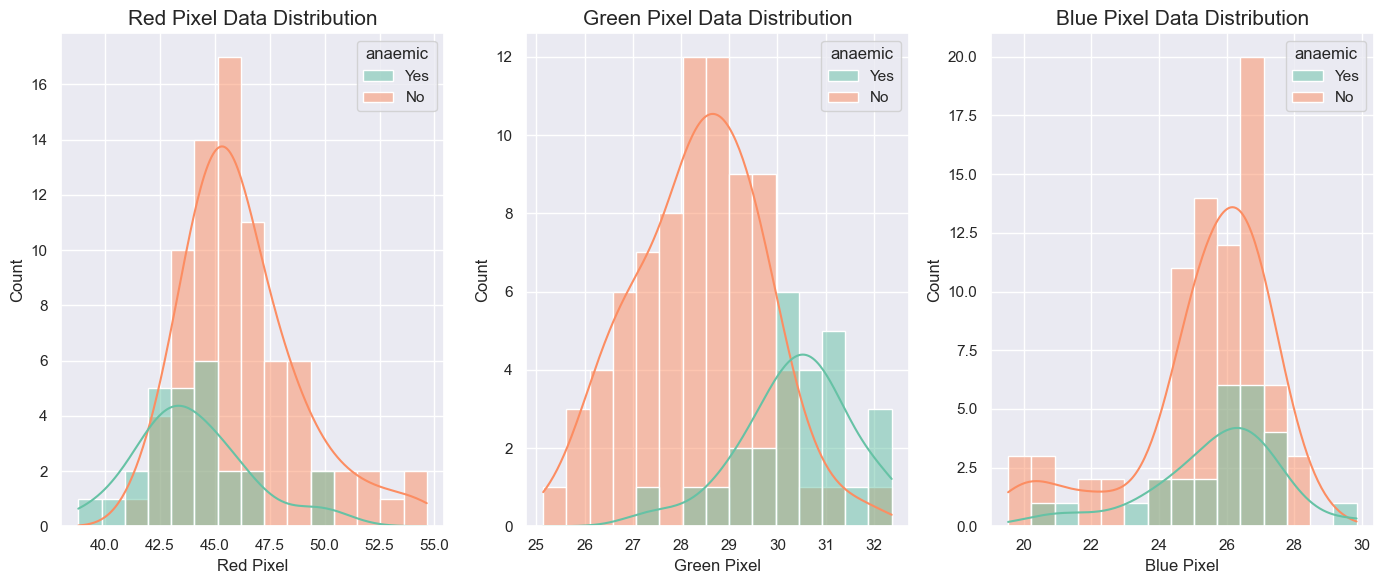

In [1621]:
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(14,6))
color = ['red_pixel','green_pixel','blue_pixel']
for i in range(0,3):
    sns.histplot(data=AnaemiaData, bins=15, x=color[i], hue='anaemic', kde=True, ax=axes[i])

axes[0].set_title("Red Pixel Data Distribution", fontsize=15)
axes[1].set_title("Green Pixel Data Distribution", fontsize=15)
axes[2].set_title("Blue Pixel Data Distribution", fontsize=15)
axes[0].set_xlabel("Red Pixel")
axes[1].set_xlabel("Green Pixel")
axes[2].set_xlabel("Blue Pixel")

plt.tight_layout()
plt.show()

#### **Correlation among independent variables**

In [1622]:
corr_matrix = AnaemiaData[AnaemiaData.describe().columns].corr()
corr_matrix

,red_pixel,green_pixel,blue_pixel,hb
red_pixel,1.000000,-0.732003,-0.845764,0.424586
green_pixel,-0.732003,1.000000,0.255589,-0.637340
blue_pixel,-0.845764,0.255589,1.000000,-0.103373
hb,0.424586,-0.637340,-0.103373,1.000000


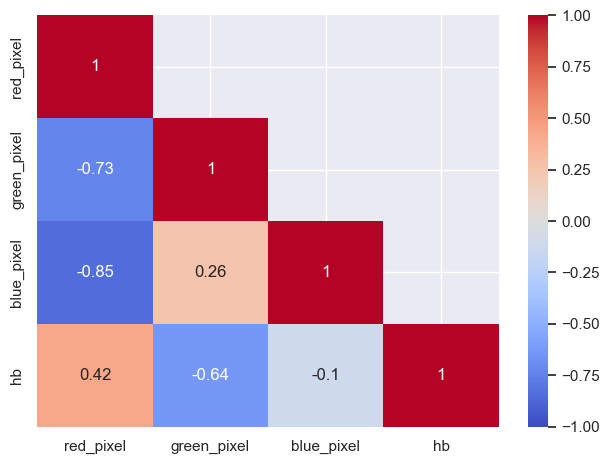

In [1623]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, mask=mask, cmap="coolwarm")
plt.tight_layout()
plt.show()

In [1624]:
AnaemiaData.head()

,sex,red_pixel,green_pixel,blue_pixel,hb,anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No


### **Data Modelling**

#### **Creating our pipeline**

In [1625]:
# Columns to be scaled
numeric_features = ["red_pixel", "green_pixel", "blue_pixel","hb"]

# Column to be binned and one-hot encoded
categorical_features = ["sex"]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['red_pixel', 'green_pixel',
                                                   'blue_pixel', 'hb']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex'])])),
                ('classifier', LogisticRegression())])

In [1640]:
# Selecting our X and y
X = AnaemiaData.drop('anaemic', axis=1)
y = AnaemiaData['anaemic']

#### **Training and test split**

In [1627]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1628]:
X_train.head(), len(X_train)

(    sex  red_pixel  green_pixel  blue_pixel    hb
 103   F    43.5706      29.8094     26.6199  12.2
 78    F    42.4532      30.9448     26.6020   9.2
 28    M    47.8913      27.0952     25.0135  14.6
 79    F    44.3346      30.4043     25.2611   8.0
 5     M    45.0994      27.9645     26.9361  16.2,
 72)

In [1629]:
X_test.head(), len(X_test)

(   sex  red_pixel  green_pixel  blue_pixel    hb
 30   M    44.2572      29.6578     26.0850  12.9
 65   F    45.4201      29.4684     25.1115  12.0
 64   F    38.7968      31.3618     29.8414   8.5
 53   F    47.1003      28.3195     24.5801  12.4
 45   M    46.9428      27.2219     25.8353  13.3,
 32)

In [1630]:
y_train.head(), len(y_train)

(103     No
 78     Yes
 28      No
 79     Yes
 5       No
 Name: anaemic, dtype: object,
 72)

In [1631]:
y_test.head(), len(y_test)

(30     No
 65     No
 64    Yes
 53     No
 45     No
 Name: anaemic, dtype: object,
 32)

In [1632]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

### **Evaluating a classification model - Metrics**

#### **Model Accuracy**

In [1633]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.96875

#### **Confusion Matrix**

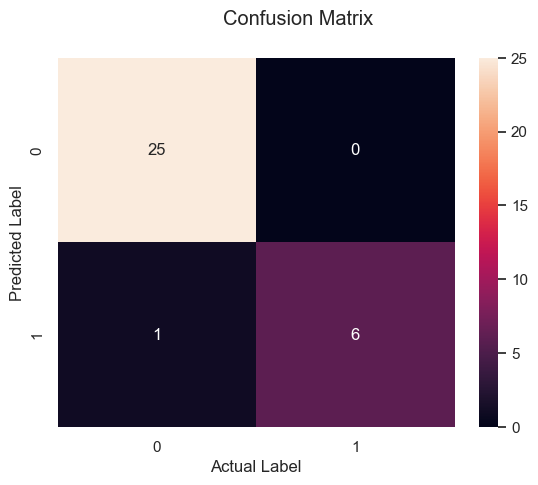

In [1634]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.set(style="darkgrid", palette="pastel")
plt.suptitle("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

#### **ROC Curve and AUC Scores***

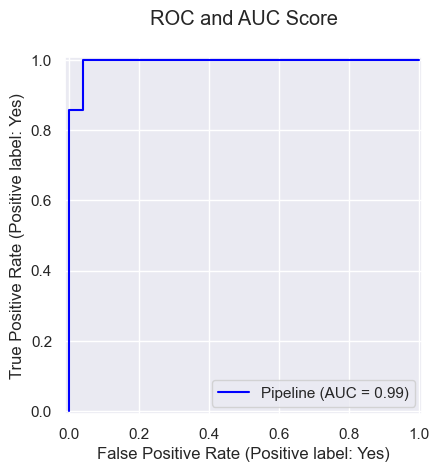

In [1635]:
sns.set(style="darkgrid", palette="pastel")
RocCurveDisplay.from_estimator(estimator=pipeline, X=X_test, y=y_test, color="blue")
plt.suptitle("ROC and AUC Score")
plt.tight_layout()
plt.show()

#### **Classification Report**

In [1636]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.96      1.00      0.98        25
         Yes       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.93      0.95        32
weighted avg       0.97      0.97      0.97        32



#### **K-fold Cross Validation**

In [1637]:
cv_scores  = cross_val_score(pipeline, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.95238095 1.         1.         1.         0.9       ]
Average cross-validation score: 0.9704761904761906


#### **Learning Curve**

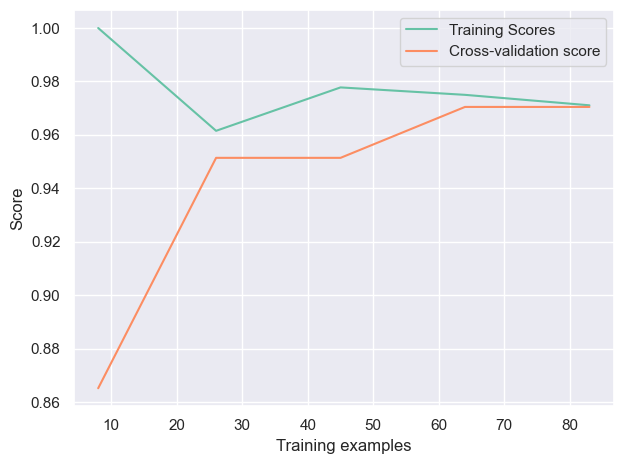

In [1638]:
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

sns.set(style="darkgrid", palette="Set2")

plt.plot(train_sizes, train_scores_mean, label="Training Scores")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()